In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# In Google Colab, uncomment this:
# !wget https://bit.ly/2FMJP5K -O setup.py && bash setup.py

# This code creates a virtual display to draw game images on.
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    %env DISPLAY = : 1

### OpenAI Gym

We're gonna spend several next weeks learning algorithms that solve decision processes. We are then in need of some interesting decision problems to test our algorithms.

That's where OpenAI gym comes into play. It's a python library that wraps many classical decision problems including robot control, videogames and board games.

So here's how it works:

In [2]:
import gym

env = gym.make('MountainCar-v0')
env.reset()

#plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(2,)
Action space: Discrete(3)


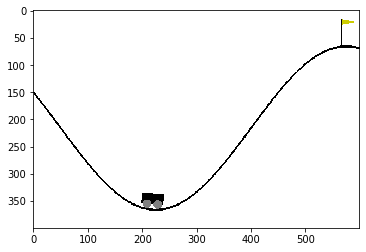

In [3]:
plt.imshow(env.render('rgb_array'))

In [5]:
env.__dict__

{'_elapsed_steps': 0,
 '_max_episode_steps': 200,
 'action_space': Discrete(3),
 'env': <gym.envs.classic_control.mountain_car.MountainCarEnv at 0x10f608940>,
 'metadata': {'render.modes': ['human', 'rgb_array'],
  'video.frames_per_second': 30},
 'observation_space': Box(2,),
 'reward_range': (-inf, inf)}

In [7]:
env.action_space.__dict__

{'dtype': dtype('int64'),
 'n': 3,
 'np_random': <mtrand.RandomState at 0x10f5e8990>,
 'shape': ()}

Note: if you're running this on your local machine, you'll see a window pop up with the image above. Don't close it, just alt-tab away.

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it ~~for now~~.

In [8]:
obs0 = env.reset()
print("initial observation code:", obs0)

# Note: in MountainCar, observation is just two numbers: car position and velocity

initial observation code: [-0.49030585  0.        ]


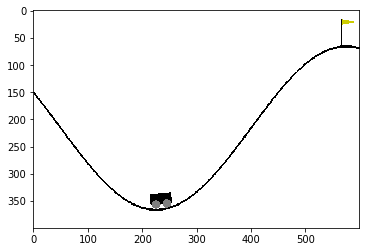

In [9]:
plt.imshow(env.render('rgb_array'))

In [10]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# Note: as you can see, the car has moved to the right slightly (around 0.0005)

taking action 2 (right)
new observation code: [-0.48955514  0.00075072]
reward: -1.0
is game over?: False


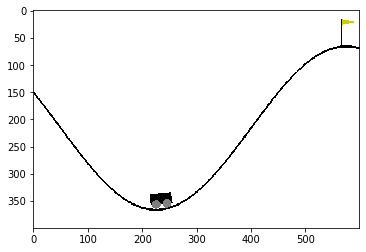

In [11]:
plt.imshow(env.render('rgb_array'))

In [37]:
result = env.step(0)

In [38]:
print("new observation code:", result[0])
print("reward:", result[1])
print("is game over?:", result[2])
print("info:", result[3])

new observation code: [-0.54056397 -0.01006768]
reward: -1.0
is game over?: False
info: {}


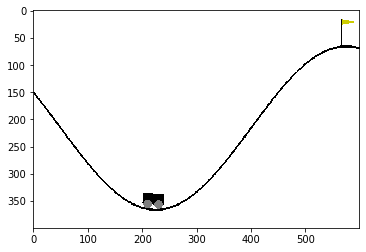

In [39]:
plt.imshow(env.render('rgb_array'))

In [22]:
help(env)

Help on TimeLimit in module gym.wrappers.time_limit object:

class TimeLimit(gym.core.Wrapper)
 |  Wraps the environment to allow a modular transformation. 
 |  
 |  This class is the base class for all wrappers. The subclass could override
 |  some methods to change the behavior of the original environment without touching the
 |  original code. 
 |  
 |  .. note::
 |  
 |      Don't forget to call ``super().__init__(env)`` if the subclass overrides :meth:`__init__`.
 |  
 |  Method resolution order:
 |      TimeLimit
 |      gym.core.Wrapper
 |      gym.core.Env
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env, max_episode_steps=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  reset(self, **kwargs)
 |      Resets the state of the environment and returns an initial observation.
 |      
 |      Returns: 
 |          observation (object): the initial observation.
 |  
 |  step(self, action)
 |      Run one timestep 

### Play with it

Below is the code that drives the car to the right. 

However, it doesn't reach the flag at the far right due to gravity. 

__Your task__ is to fix it. Find a strategy that reaches the flag. 

You're not required to build any sophisticated algorithms for now, feel free to hard-code :)

__Hint__: your action at each step should depend either on `t` or on `s`.

In [41]:
help(gym.wrappers.TimeLimit)

Help on class TimeLimit in module gym.wrappers.time_limit:

class TimeLimit(gym.core.Wrapper)
 |  Wraps the environment to allow a modular transformation. 
 |  
 |  This class is the base class for all wrappers. The subclass could override
 |  some methods to change the behavior of the original environment without touching the
 |  original code. 
 |  
 |  .. note::
 |  
 |      Don't forget to call ``super().__init__(env)`` if the subclass overrides :meth:`__init__`.
 |  
 |  Method resolution order:
 |      TimeLimit
 |      gym.core.Wrapper
 |      gym.core.Env
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, env, max_episode_steps=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  reset(self, **kwargs)
 |      Resets the state of the environment and returns an initial observation.
 |      
 |      Returns: 
 |          observation (object): the initial observation.
 |  
 |  step(self, action)
 |      Run one timestep o

In [42]:
from IPython import display

In [55]:
TIME_LIMIT = 250
temp_env=gym.envs.classic_control.MountainCarEnv()
temp_env.max_episode_steps = TIME_LIMIT+1


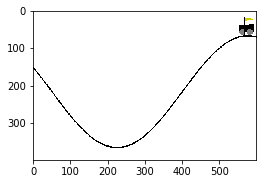

In [84]:
from IPython import display

# create env manually to set time limit. Please don't change this.
TIME_LIMIT = 250
#env = gym.wrappers.TimeLimit(
#    gym.envs.classic_control.MountainCarEnv(),
#    max_episode_steps=TIME_LIMIT + 1,
#)
env=gym.envs.classic_control.MountainCarEnv()
env.max_episode_steps = TIME_LIMIT+1


s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

plt.figure(figsize=(4, 3))
display.clear_output(wait=True)


for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    # change the line below to reach the flag

    if t>0 and t<40:
        side = 'left'
    elif t>80 and t<120:
        side = 'right'
    elif t>120 and t<160:
        side = 'left'
    elif t>160 and t<200:
        side = 'right'
    else:
        side = 'right'
    s, r, done, _ = env.step(actions[side])
        
    print(t, s, r, side)
        


    # draw game image on display
    plt.imshow(env.render('rgb_array'))
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [83]:
assert s[0] > 0.47
print("You solved it!")

You solved it!
